In [1]:
import numpy as np 
import pandas as pd

from K_means import Kmeans
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from scipy.spatial.distance import cdist

import string

from nltk.corpus import stopwords

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import neattext.functions as nfx

from textblob import TextBlob as tb
from textblob import Word

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore')

In [2]:
june=pd.read_csv('04_PREPROCESSED_JUNE.csv')

In [3]:
custom_words = ['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather',
                'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come', '%', '.', 'the', 'etc', 'pls', 'btw', 'let', 'hgd', 'get', 'amp', 'gt', 
                'lt', 'hrs', 'dos', 'say', 'reply', 'sir', 'replying']

In [4]:
for i in range(0,june.shape[0]):
    june['clean_tweet'][i]= ''.join([i for i in june['clean_tweet'][i] if not i.isdigit()])
    june['clean_tweet'][i]=june['clean_tweet'][i].lower()
    june['clean_tweet'][i]=nfx.remove_custom_words(june['clean_tweet'][i],custom_words)

In [5]:
tweets_june=june['clean_tweet']

In [6]:
tweet_list_june = tweets_june.apply(nfx.remove_stopwords)
tweet_list_june = tweet_list_june .apply(nfx.remove_special_characters)
tweet_list_june = tweet_list_june.apply(nfx.remove_punctuations)

In [7]:
def remove_single_char(list):
    for token in list:
        if( len(token)==1):
            list.remove(token)
def remove_dual_char(list):
    for token in list:
        if( len(token)==2):
            list.remove(token)
def remove_words(list1, remove_words):
    for word in list(list1):
        if word in remove_words:
            list1.remove(word)
    return list1   

In [8]:
def Convert_list(string):
    li = list(string.split(" "))
    return li
def listToString(s): 
    str1 = " " 
    return (str1.join(s))

In [9]:
for i in range(0,june.shape[0]):
    ls=Convert_list(tweet_list_june[i])
    remove_single_char(ls)
    remove_dual_char(ls)
    ls=remove_words(ls,custom_words)
    tweet_list_june[i]=listToString(ls)

In [10]:
def my_lemma(token,i=0):
    word=tb(token)
    tags=word.tags
    sample=Word(tags[0][0])
    if tags[0][1][0] =='V':
        x=sample.lemmatize('v')
        ls[i]=x
    else:
        x=sample.lemmatize()
        ls[i]=x

In [11]:
for i in range(0,june.shape[0]):
    ls=Convert_list(tweet_list_june[i])
    for j in range(0,len(ls)):
        text=ls[j]
        if(text==""):
                continue
        word=tb(text)
        tags=word.tags
        sample=Word(tags[0][0])
        if tags[0][1][0] =='V':
                x=sample.lemmatize('v')
                ls[j]=x
        else:
                x=sample.lemmatize()
                ls[j]=x

In [12]:
for i in range(0,june.shape[0]):
    ls=Convert_list(tweet_list_june[i])
    for j in range(0,len(ls)):
        text=ls[j]
        if(text==""):
            continue
        my_lemma(text,j)
    tweet_list_june[i]=listToString(ls)

In [13]:
for i in range(0,june.shape[0]):
    ls=Convert_list(tweet_list_june[i])
    ls=remove_words(ls,custom_words)
    tweet_list_june[i]=listToString(ls)

In [14]:
june['clean_tweet']=tweet_list_june

In [15]:
june['clean_tweet']

0       notice change psychological physical condition...
1       goodbye indian south african british coronavir...
2                                     dear donate retweet
3                  best future dream job direct sell like
4       mosque worshiper visitor pray corona virus end...
                              ...                        
2434                          covid impact family country
2435    entire govt machinery work resolute leadership...
2436            young life covid husband colleague mumbai
2437                                                     
2438    effective vaccine protect family member countr...
Name: clean_tweet, Length: 2439, dtype: object

In [16]:
tweet_list_june=june['clean_tweet']
ps=PorterStemmer()
for i in range(0,june.shape[0]):
    ls=june['clean_tweet'][i]
    words = word_tokenize(ls)
    st=""
    for w in words:
        w=ps.stem(w)
        st+=w+' '
    june['clean_tweet'][i]=st
for i in range(0,june.shape[0]):
    ls=Convert_list(tweet_list_june[i])
    remove_single_char(ls)
    remove_dual_char(ls)
    ls=remove_words(ls,custom_words)
    tweet_list_june[i]=listToString(ls)
june['clean_tweet']=tweet_list_june


# K-Means

In [17]:
data =june['clean_tweet']

tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [18]:
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names())

,aaa,aad,aadharpan,aai,aaj,aajii,aajtak,aandh,aap,aapi,...,zealand,zeeshan,zenica,zero,zerowastag,zinc,zindabad,zombi,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

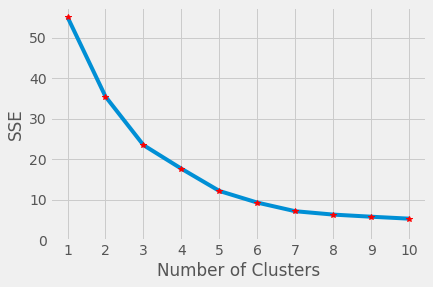

In [20]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans_kwargs = {"init": "k-means++","n_init": 2,"max_iter": 1000,"random_state": 42,}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(Y_sklearn)
    sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.plot(range(1, 11), sse,'r*')
plt.xticks(range(1, 11))
plt.yticks(range(0,60,10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5960750984332851
For n_clusters = 3 The average silhouette_score is : 0.6093093451211761
For n_clusters = 4 The average silhouette_score is : 0.543175356042765
For n_clusters = 5 The average silhouette_score is : 0.48048724910866586
For n_clusters = 6 The average silhouette_score is : 0.4604809262594035
For n_clusters = 7 The average silhouette_score is : 0.47290790405396743
For n_clusters = 8 The average silhouette_score is : 0.480035914040969
For n_clusters = 9 The average silhouette_score is : 0.4635074967120413
For n_clusters = 10 The average silhouette_score is : 0.3965874126997262


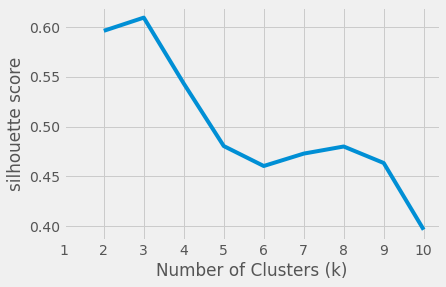

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.style as style
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, **kmeans_kwargs)
    cluster_labels = clusterer.fit_predict(Y_sklearn)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Y_sklearn, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Y_sklearn, cluster_labels)
style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.xticks(range(1, 11))
plt.show()

Text(0.5, 1.0, 'June')

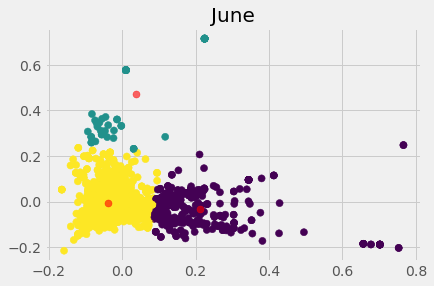

In [45]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=3, max_iter=1000,n_init=2, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

centers = fitted.cluster_centers_
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='red', s=50, alpha=0.6);
plt.title('June',fontsize=20)
# plt.xlabel("Feature space for the 1st feature")
# plt.ylabel("Feature space for the 2nd feature")

In [23]:
labels = np.unique(prediction)
dfs1 = []
for label in labels:
    id_temp = np.where(prediction==label) 
    x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
    sorted_means = np.argsort(x_means)[::-1]
    features = tf_idf_vectorizor.get_feature_names()
    best_features = [(features[i], x_means[i]) for i in sorted_means]
    df = pd.DataFrame(best_features, columns = ['features', 'score'])
    dfs1.append(df)

In [24]:
dfs1[0]

,features,score
0,vaccin,0.239889
1,covid,0.072680
2,dose,0.039922
3,india,0.031704
4,administ,0.028396
...,...,...
5465,pakistani,0.000000
5466,pal,0.000000
5467,palakkad,0.000000
5468,palan,0.000000


In [25]:
dfs1[1]

,features,score
0,covid,0.040459
1,corona,0.027822
2,curfew,0.016013
3,peopl,0.014417
4,case,0.014169
...,...,...
5465,reimburs,0.000000
5466,recruit,0.000000
5467,impot,0.000000
5468,recommend,0.000000


In [26]:
dfs1[2]

,features,score
0,covid,0.392263
1,updat,0.259207
2,live,0.254044
3,case,0.105165
4,coronaviru,0.086705
...,...,...
5465,pois,0.000000
5466,poison,0.000000
5467,polic,0.000000
5468,policeman,0.000000


In [27]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 10)

In [28]:
june_cluster=dfs

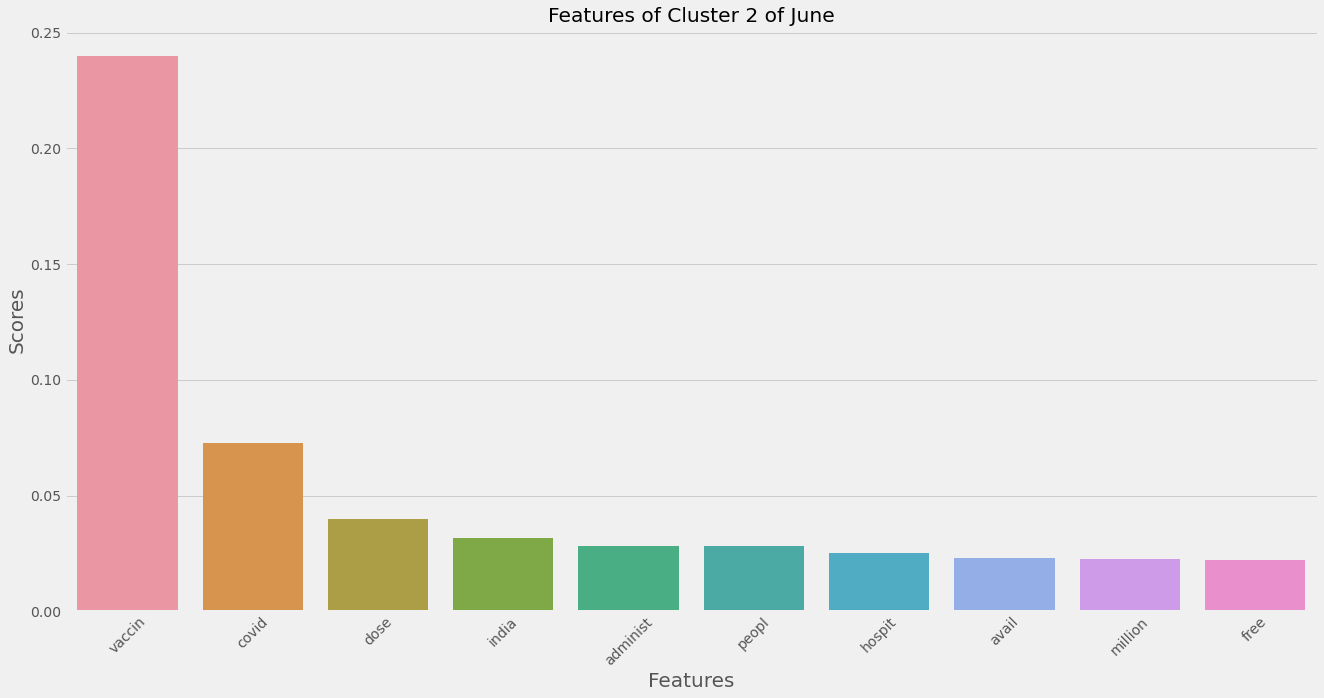

In [48]:

# Figure Size
fig = plt.figure(figsize =(20, 10))
 
# Horizontal Bar Plot
sns.barplot(x='features',y='score',data=june_cluster[0]).set(title="Features of Cluster 2 of June")
plt.xlabel('Features',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.xticks(rotation=45)
# Show Plot
plt.show()

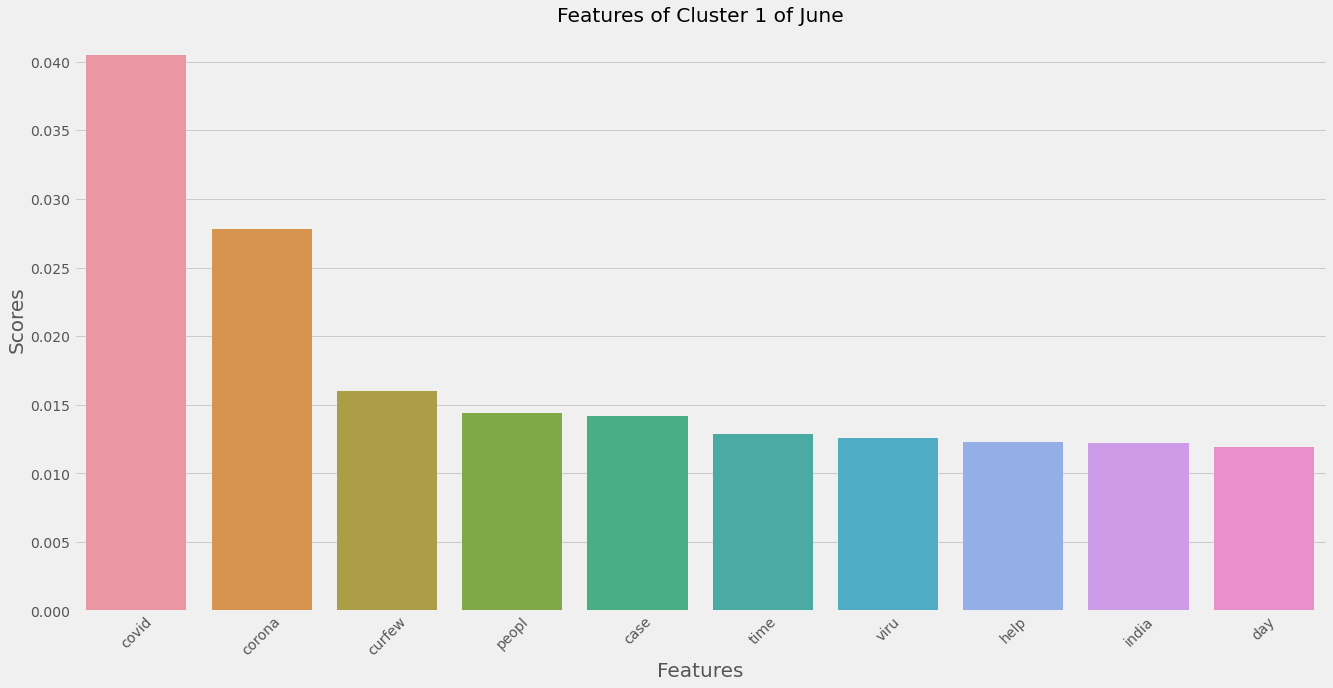

In [47]:

# Figure Size
fig = plt.figure(figsize =(20, 10))
 
# Horizontal Bar Plot
sns.barplot(x='features',y='score',data=june_cluster[1]).set(title="Features of Cluster 1 of June")
plt.xlabel('Features',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.xticks(rotation=45)
# Show Plot
plt.show()

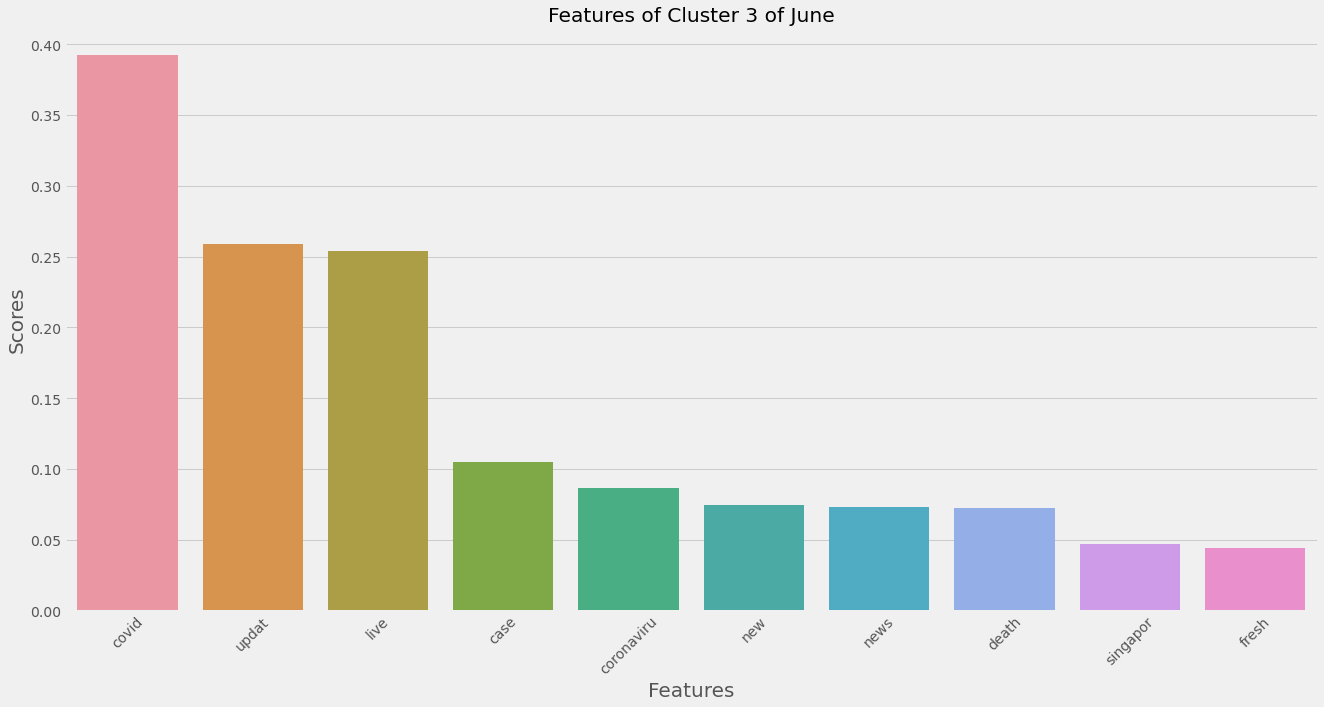

In [49]:

# Figure Size
fig = plt.figure(figsize =(20, 10))
 
# Horizontal Bar Plot
sns.barplot(x='features',y='score',data=june_cluster[2]).set(title="Features of Cluster 3 of June")
plt.xlabel('Features',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.xticks(rotation=45)
# Show Plot
plt.show()

In [32]:
K3=dfs1[2]
K1=dfs1[0]
K2=dfs1[1]

In [33]:
june_bw=pd.read_csv('JuneTopWords.csv')

In [34]:
t=june_bw[:30]


In [35]:
c1=[]
p=0
c2=[]
q=0
c3=[]
x=0
for i in range(0,30):
    for j in range(0,100):
        if(t.words[i]==K1['features'][j]):
            c1.append(K1['features'][j])
            p=p+1
for i in range(0,30):
    for j in range(0,100):
        if(t.words[i]==K2['features'][j]):
            c2.append(K1['features'][j])
            q=q+1
for i in range(0,30):
    for j in range(0,100):
        if(t.words[i]==K3['features'][j]):
            c3.append(K3['features'][j])
            x=x+1

In [36]:

print(p)
print(q)
print(x)

21
29
16


### Tweet Grouping

In [37]:
label=kmeans.labels_
june['label']=label
june.head(3)

,tweet,clean_tweet,hastags,attherate,urls,emojis,label
0,Did anyone notice a change in their psychologi...,notic chang psycholog physic condit coronaviru...,[],[],[],[],1
1,"Say goodbye to the “Indian,” “South African” a...",goodby indian south african british coronaviru...,[],[],['https://t.co/nkQo4IdGqO'],[],1
2,"Dear all, Keep Donate Keep Retweet https://t...",dear donat retweet,"['#milaap', '#verified', '#campaign', '#COVID1...",[],['https://t.co/TRRT59Sd8K'],[],1


In [38]:
np.unique(june['label'])

array([0, 1, 2])

In [39]:
june['label'].value_counts()

1    2034
0     353
2      52
Name: label, dtype: int64

In [40]:
june_cluster_1=june[june.label ==0]
june_cluster_2=june[june.label ==1]
june_cluster_3=june[june.label ==2]

In [41]:
june_cluster_1.to_csv('JuneCluster1Tweet.csv')
june_cluster_2.to_csv('JuneCluster2Tweet.csv')
june_cluster_3.to_csv('JuneCluster3Tweet.csv')

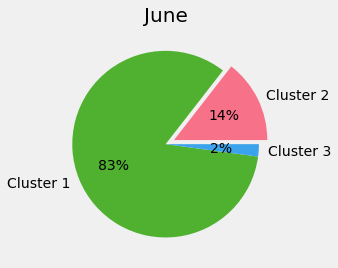

In [46]:
count=june['label'].value_counts()
tweet_freq_cluster=[]
tweet_freq_cluster.append(count[0])
tweet_freq_cluster.append(count[1])
tweet_freq_cluster.append(count[2])
cluster_name=['Cluster 2','Cluster 1','Cluster 3']
explode = [0.1, 0,0]
palette_color = sns.color_palette("husl", 3)
plt.title('June',fontsize=20)
# plotting data on chart
plt.pie(tweet_freq_cluster, labels=cluster_name, colors=palette_color,   explode=explode,autopct='%.0f%%')
  
# displaying chart
plt.show()

In [43]:
june['tweet'][1846]

'✳️ COVID-19 Live Updates: 22/06/2021  @thoddoo_hc  https://t.co/oAR3a9NMvK'